# Super Store data analysis 
###### by Rohit Jadhav

# 

### Super Store Kaggle Dataset
#### Link: https://www.kaggle.com/datasets/jr2ngb/superstore-data
        
#### Data Dictionary:
    1. Order ID 2. Order Date 3. Ship Date 4. Ship Mode 5. Customer ID 6. Customer Name
    7. Segment 8. City 9. State 10. Country 11. Postal Code 12. Market 13. Region
    14. Product ID 15. Category 16. Sub-Category 17. Product Name 18. Sales 19. Quantity
    20. Discount 21. Profit 22. Shipping Cost 23. Order Priority

# 

#### Import libraries

In [42]:
#import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
#read dataset 
df = pd.read_csv('superstore_dataset.csv', encoding='ISO-8859-1')

In [3]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High


In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

# 

#### Convert Variable types

In [8]:
# Convert Ship mode into category type
df['Ship Mode'] = df['Ship Mode'].astype('category')

In [9]:
# Convert Segment into category type
df['Segment'] = df['Segment'].astype('category')

In [10]:
# Convert Market into category type
df['Market'] = df['Market'].astype('category')

In [11]:
# Convert Categort and SubCategory into category type
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')

In [12]:
# Convert Order priority into category type
df['Order Priority'] = df['Order Priority'].astype('category')

In [13]:
# Convert Order and Ship Date into Date type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [27]:
# Insert a new column year_month from order date
df.insert(loc=2, column='year_month', value=df['Order Date'].map(lambda x: 100*x.year + x.month))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   year_month      51290 non-null  int64         
 3   Order Date      51290 non-null  datetime64[ns]
 4   Ship Date       51290 non-null  datetime64[ns]
 5   Ship Mode       51290 non-null  category      
 6   Customer ID     51290 non-null  object        
 7   Customer Name   51290 non-null  object        
 8   Segment         51290 non-null  category      
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Postal Code     9994 non-null   float64       
 13  Market          51290 non-null  category      
 14  Region          51290 non-null  object        
 15  Pr

# 

In [31]:
df2 = df.copy()

In [32]:
df2.describe()

,Row ID,year_month,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,201284.864223,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,109.934674,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,201101.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,201206.000000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,201306.000000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,201404.000000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,201412.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


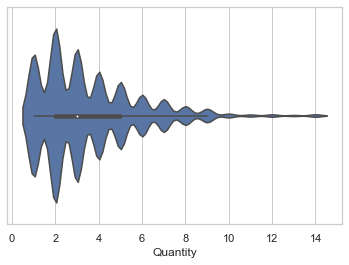

In [33]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [34]:
# Add Order Month for further analysis
df2['purchase_month'] = df2['Order Date'].dt.month
df2.head()

,Row ID,Order ID,year_month,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,purchase_month
0,42433,AG-2011-2040,201101,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1
1,22253,IN-2011-47883,201101,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1
2,48883,HU-2011-1220,201101,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1
3,11731,IT-2011-3647632,201101,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1
4,22255,IN-2011-47883,201101,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1


In [35]:
# Add Order Month for further analysis
df2['purchase_year'] = df2['Order Date'].dt.year
df2.head()

,Row ID,Order ID,year_month,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,purchase_month,purchase_year
0,42433,AG-2011-2040,201101,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1,2011
1,22253,IN-2011-47883,201101,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1,2011
2,48883,HU-2011-1220,201101,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1,2011
3,11731,IT-2011-3647632,201101,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1,2011
4,22255,IN-2011-47883,201101,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1,2011


In [36]:
df2['purchase_month'].value_counts()

11    5660
12    5534
9     5237
6     4892
8     4715
10    4467
5     3938
3     3728
7     3571
4     3499
1     3122
2     2927
Name: purchase_month, dtype: int64

In [37]:
df2['purchase_year'].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: purchase_year, dtype: int64

# 

# Exploring and Analysing Data

In [38]:
# Number of Orders Made per customer for each country
# Order Id count for sales
order_per_cust = df2.groupby(by=['Customer ID','Country'], as_index=False)['Order ID'].count().sort_values(by='Order ID', ascending=False)
order_per_cust.columns = ['CustomerID', 'Country', "NumberOfSales"]
order_per_cust.head(5)

,CustomerID,Country,NumberOfSales
15612,WB-21850,United States,37
12020,PP-18955,United States,34
7682,JL-15835,United States,34
9536,MA-17560,United States,34
14255,SV-20365,United States,32


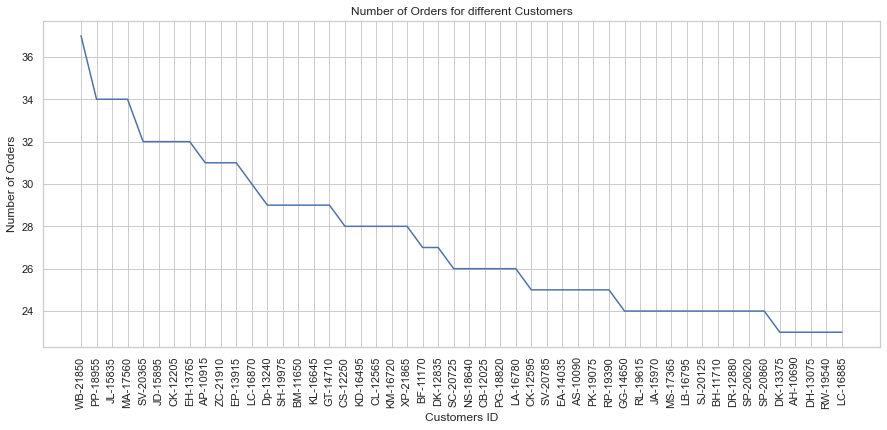

In [39]:
# Visualizing No. of Sales for all Customers
#top 50
orders = df2.groupby(by=['Customer ID','Country'], as_index=False)['Order ID'].count().sort_values(by='Order ID', ascending=False).iloc[0:50]

plt.subplots(figsize=(15,6))
plt.plot(orders['Customer ID'], orders['Order ID'])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.xticks(rotation='vertical')
plt.show()

In [24]:
# Total Shipping cost paid by customer
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_cust = df2.groupby(by=['Customer ID','Country'], as_index=False)['Shipping Cost'].sum().sort_values(by='Shipping Cost', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "Total Shipping Cost"]
spent_per_cust.head(10)

,CustomerID,Country,Total Shipping Cost
11597,PB-19210,Taiwan,2076.62
4531,DP-13105,Australia,1638.27
8461,KF-16285,United States,1584.08
5616,FH-14365,Mexico,1362.61
7459,JK-15325,China,1325.14
12730,RH-19495,United States,1317.19
10449,MM-7260,Saudi Arabia,1314.72
14733,TC-21295,United States,1310.50
7682,JL-15835,United States,1293.93
4405,DM-13015,United States,1273.12


In [40]:
df2.head(3)

,Row ID,Order ID,year_month,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,purchase_month,purchase_year
0,42433,AG-2011-2040,201101,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1,2011
1,22253,IN-2011-47883,201101,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1,2011
2,48883,HU-2011-1220,201101,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1,2011


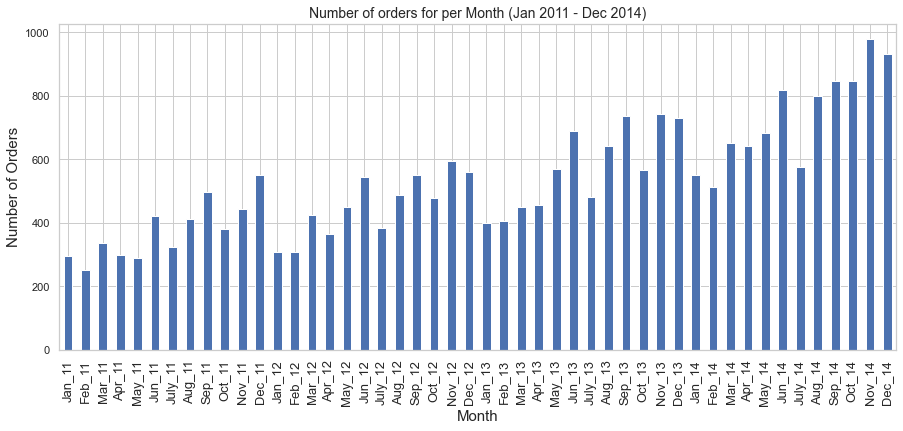

In [41]:
# Create a plot that shows the number of orders per month 
ax = df2.groupby('year_month')['Order ID'].nunique().sort_index().plot(kind = 'bar',color='b',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (Jan 2011 - Dec 2014)',fontsize=14)
ax.set_xticklabels(('Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11','Jan_12','Feb_12','Mar_12','Apr_12','May_12','Jun_12','July_12','Aug_12','Sep_12','Oct_12','Nov_12','Dec_12','Jan_13','Feb_13','Mar_13','Apr_13','May_13','Jun_13','July_13','Aug_13','Sep_13','Oct_13','Nov_13','Dec_13','Jan_14','Feb_14','Mar_14','Apr_14','May_14','Jun_14','July_14','Aug_14','Sep_14','Oct_14','Nov_14','Dec_14'), rotation='vertical', fontsize=13)
plt.show()

In [62]:
df2.groupby('year_month')['Order ID'].nunique().sort_index()

year_month
201101    297
201102    251
201103    337
201104    299
201105    288
201106    422
201107    323
201108    413
201109    497
201110    381
201111    445
201112    552
201201    308
201202    307
201203    426
201204    366
201205    451
201206    546
201207    384
201208    489
201209    552
201210    478
201211    596
201212    561
201301    400
201302    406
201303    450
201304    457
201305    571
201306    689
201307    482
201308    643
201309    738
201310    568
201311    743
201312    730
201401    551
201402    514
201403    653
201404    641
201405    683
201406    819
201407    576
201408    799
201409    846
201410    847
201411    978
201412    931
Name: Order ID, dtype: int64

In [71]:
df2.Sales.describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

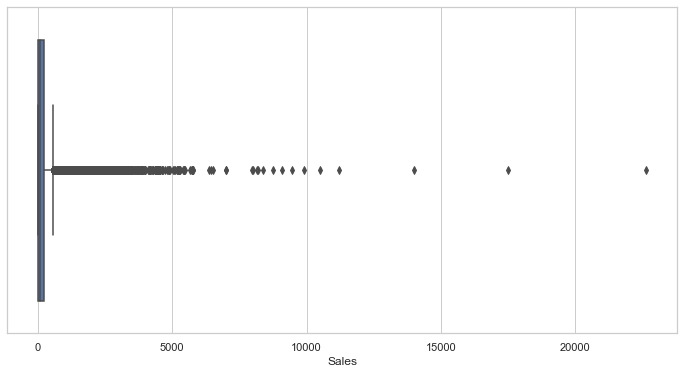

In [72]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.Sales)
plt.show()

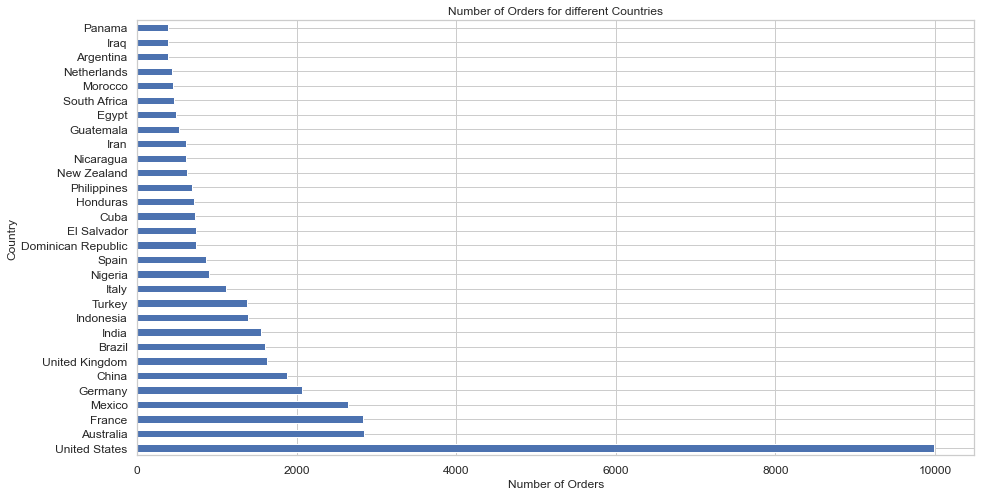

In [43]:
#top 30
group_country_orders = df2.groupby('Country')['Order ID'].count().sort_values(ascending=False).head(30)

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color='b')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

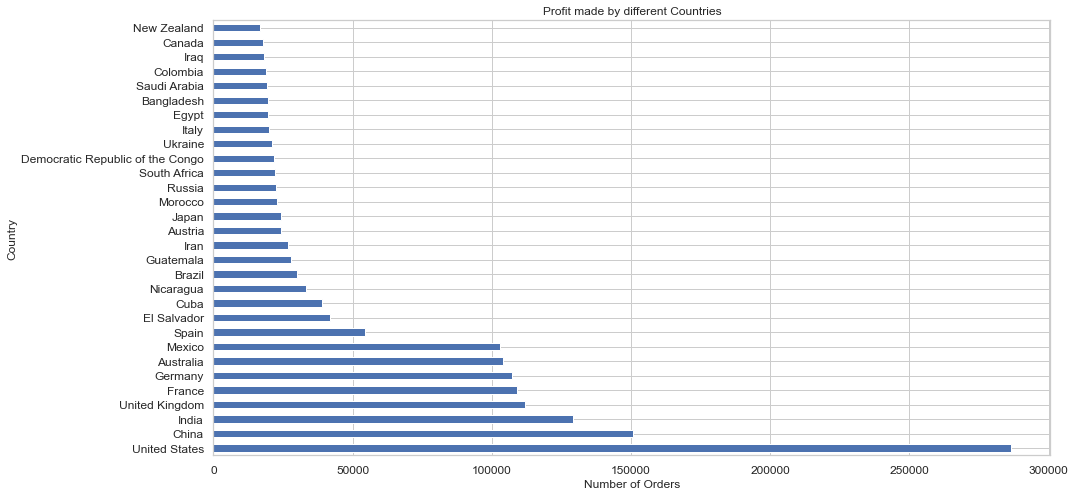

In [44]:
#Profit made per countries
# top 30
group_country_orders = df2.groupby('Country')['Profit'].sum().sort_values(ascending=False).head(30)

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color='b')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Profit made by different Countries', fontsize=12)
plt.show()

In [93]:
print('Date Range: %s to %s' % (df2['Order Date'].min(), df2['Order Date'].max()))

Date Range: 2011-01-01 00:00:00 to 2014-12-31 00:00:00


In [95]:
order_customer_df = df2.groupby(by=['Order ID', 'Order Date']).agg({'Profit': sum, 'Customer ID': max,'Country': max,}).reset_index()
order_customer_df.head()

,Order ID,Order Date,Profit,Customer ID,Country
0,AE-2011-9160,2011-03-10,-246.078,PO-8865,United Arab Emirates
1,AE-2013-1130,2013-10-14,-236.964,EB-4110,United Arab Emirates
2,AE-2013-1530,2013-12-31,-38.076,MY-7380,United Arab Emirates
3,AE-2014-2840,2014-05-11,-75.060,PG-8820,United Arab Emirates
4,AE-2014-3830,2014-12-13,-429.108,GH-4665,United Arab Emirates


In [97]:
len(order_customer_df)

25752

In [98]:
order_customer_df.sort_values(by='Profit', ascending=False).head(10)

,Order ID,Order Date,Profit,Customer ID,Country
2421,CA-2013-118689,2013-03-10,8762.3891,TC-20980,United States
4087,CA-2014-140151,2014-03-24,6734.4720,RB-19360,United States
4618,CA-2014-166709,2014-11-18,5039.9856,HL-15040,United States
2396,CA-2013-117121,2013-12-18,4946.3700,AB-10105,United States
558,CA-2011-116904,2011-09-23,4668.6935,SC-20095,United States
3838,CA-2014-127180,2014-10-23,4597.1657,TA-21385,United States
8117,ES-2014-1651774,2014-08-09,3979.0800,PJ-18835,Italy
1781,CA-2012-145352,2012-03-16,3192.0682,CM-12385,United States
9696,ID-2011-64599,2011-10-02,3033.9900,CA-11965,Japan
3045,CA-2013-158841,2013-02-02,2825.2862,SE-20110,United States


In [106]:
monthly_repeat_customers_df = invoice_customer_df.set_index('Order Date').groupby([
  pd.Grouper(freq='M'), 'Customer ID']).filter(lambda x: len(x) > 1).resample('M').nunique()['Customer ID']

monthly_repeat_customers_df.head()

Order Date
2011-01-31    29
2011-02-28    25
2011-03-31    32
2011-04-30    33
2011-05-31    33
Freq: M, Name: Customer ID, dtype: int64

In [107]:
monthly_unique_customers_df = df2.set_index('Order Date')['Customer ID'].resample('M').nunique()
monthly_unique_customers_df.head()

Order Date
2011-01-31    266
2011-02-28    223
2011-03-31    302
2011-04-30    263
2011-05-31    251
Freq: M, Name: Customer ID, dtype: int64

In [108]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

Order Date
2011-01-31    10.902256
2011-02-28    11.210762
2011-03-31    10.596026
2011-04-30    12.547529
2011-05-31    13.147410
2011-06-30    15.642458
2011-07-31    12.676056
2011-08-31    18.128655
2011-09-30    20.759494
2011-10-31    14.110429
2011-11-30    13.506494
2011-12-31    24.590164
2012-01-31    14.393939
2012-02-29    10.545455
2012-03-31    17.280453
2012-04-30    17.940199
2012-05-31    19.060773
2012-06-30    19.775281
2012-07-31    16.875000
2012-08-31    18.181818
2012-09-30    20.993228
2012-10-31    19.280206
2012-11-30    22.698073
2012-12-31    24.480370
2013-01-31    16.023739
2013-02-28    14.985591
2013-03-31    16.000000
2013-04-30    20.000000
2013-05-31    23.595506
2013-06-30    26.295585
2013-07-31    23.177083
2013-08-31    19.619048
2013-09-30    27.256318
2013-10-31    22.717149
2013-11-30    28.205128
2013-12-31    27.407407
2014-01-31    19.777778
2014-02-28    20.095694
2014-03-31    25.557809
2014-04-30    28.907923
2014-05-31    25.000000
2014-

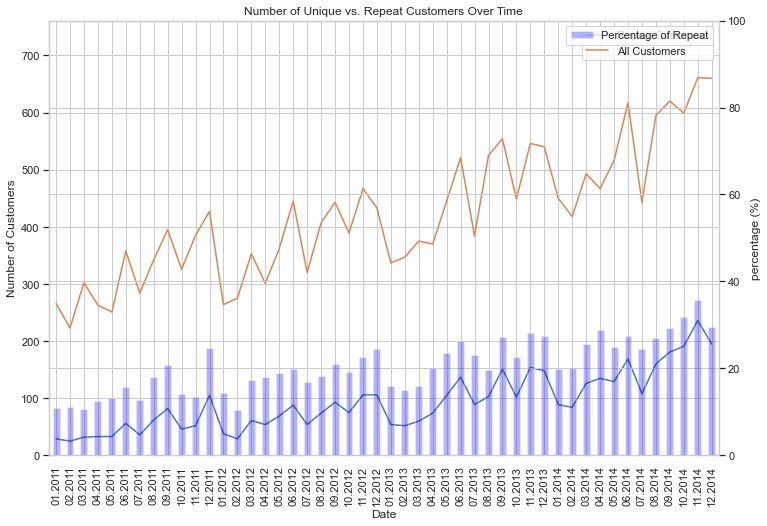

In [109]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()